# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [107]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [108]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid="+weather_api_key+"&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | puerto aysen
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | afega
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | kerikeri
Processing Record 13 of Set 1 | st. john's
Processing Record 14 of Set 1 | la'ie
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | okha
Processing Record 17 of Set 1 | tinajo
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | dzhangala
Processing Record 20 of Set 1 | inverness
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | petropavlovsk-kamchats

Processing Record 39 of Set 4 | chibougamau
Processing Record 40 of Set 4 | el granada
Processing Record 41 of Set 4 | tanumah
Processing Record 42 of Set 4 | khandyga
Processing Record 43 of Set 4 | mariental
Processing Record 44 of Set 4 | marudi
City not found. Skipping...
Processing Record 45 of Set 4 | ciudad madero
Processing Record 46 of Set 4 | quelimane
Processing Record 47 of Set 4 | zambezi
Processing Record 48 of Set 4 | vorkuta
Processing Record 49 of Set 4 | beira
Processing Record 0 of Set 5 | port alfred
Processing Record 1 of Set 5 | pisco
Processing Record 2 of Set 5 | bakanas
Processing Record 3 of Set 5 | tanjung selor
City not found. Skipping...
Processing Record 4 of Set 5 | prineville
Processing Record 5 of Set 5 | san antonio de pale
Processing Record 6 of Set 5 | padang
Processing Record 7 of Set 5 | svetlyy
Processing Record 8 of Set 5 | selfoss
Processing Record 9 of Set 5 | guerrero negro
Processing Record 10 of Set 5 | goz beida
Processing Record 11 of Set 

Processing Record 30 of Set 8 | maun
Processing Record 31 of Set 8 | kolonia town
Processing Record 32 of Set 8 | ajaccio
Processing Record 33 of Set 8 | boguszow-gorce
Processing Record 34 of Set 8 | walvis bay
Processing Record 35 of Set 8 | ananyiv
Processing Record 36 of Set 8 | roma
Processing Record 37 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 38 of Set 8 | igarka
Processing Record 39 of Set 8 | junin de los andes
Processing Record 40 of Set 8 | pitimbu
Processing Record 41 of Set 8 | mazagao
Processing Record 42 of Set 8 | tsiombe
Processing Record 43 of Set 8 | chos malal
Processing Record 44 of Set 8 | zhanaozen
Processing Record 45 of Set 8 | ntungamo
Processing Record 46 of Set 8 | kloulklubed
Processing Record 47 of Set 8 | cooper's town
Processing Record 48 of Set 8 | ratnagiri
Processing Record 49 of Set 8 | ketchikan
Processing Record 0 of Set 9 | takoradi
Processing Record 1 of Set 9 | yarkovo
Processing Record 2 of Set 9 | jennings
Processing Re

Processing Record 19 of Set 12 | barra de santo antonio
Processing Record 20 of Set 12 | las toscas
Processing Record 21 of Set 12 | mount pearl
Processing Record 22 of Set 12 | bulgan
Processing Record 23 of Set 12 | matsubase
Processing Record 24 of Set 12 | sarikei
Processing Record 25 of Set 12 | san jose village
City not found. Skipping...
Processing Record 26 of Set 12 | tindouf
Processing Record 27 of Set 12 | cable beach
City not found. Skipping...
Processing Record 28 of Set 12 | hitachi
-----------------------------
Data Retrieval Complete      
-----------------------------


In [109]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [110]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-18.71,84,100,4.63,CA,1701662246
1,port-aux-francais,-49.3500,70.2167,3.92,72,8,14.96,TF,1701662246
2,grytviken,-54.2811,-36.5092,1.01,73,5,2.86,GS,1701662247
3,puerto ayora,-0.7393,-90.3518,24.19,92,82,1.79,EC,1701662247
4,puerto aysen,-45.4000,-72.7000,6.88,99,99,1.30,CL,1701662247


In [111]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [112]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-18.71,84,100,4.63,CA,1701662246
1,port-aux-francais,-49.3500,70.2167,3.92,72,8,14.96,TF,1701662246
2,grytviken,-54.2811,-36.5092,1.01,73,5,2.86,GS,1701662247
3,puerto ayora,-0.7393,-90.3518,24.19,92,82,1.79,EC,1701662247
4,puerto aysen,-45.4000,-72.7000,6.88,99,99,1.30,CL,1701662247


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

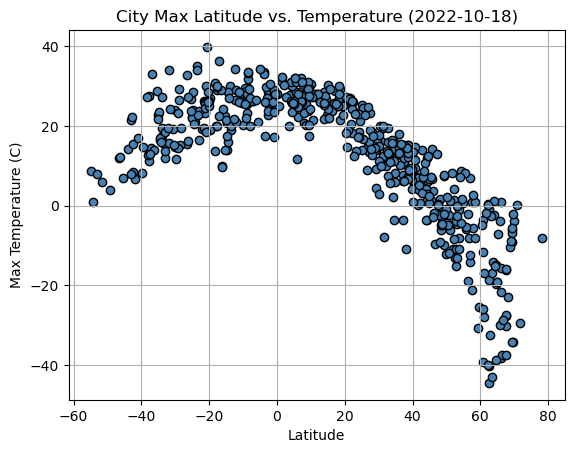

In [113]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

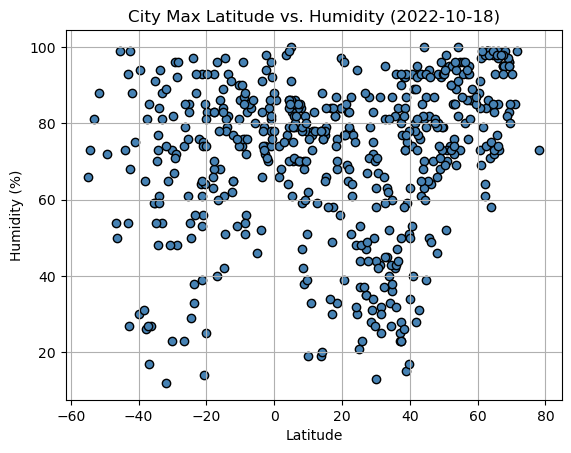

In [114]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

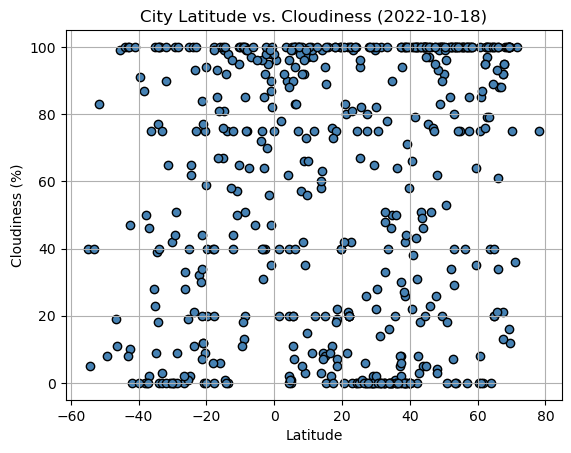

In [115]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

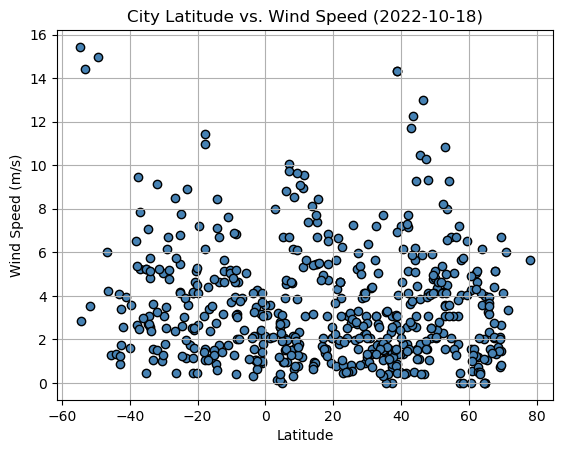

In [116]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [117]:
# Define a function to create Linear Regression plots
def plotting(x,y,regress_values,line_eq,location,xlabel,ylabel):
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,location,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt

In [118]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-18.71,84,100,4.63,CA,1701662246
5,stanley,54.8680,-1.6985,0.71,96,75,2.06,GB,1701661977
12,st. john's,47.5649,-52.7093,0.54,80,100,1.54,CA,1701662020
13,la'ie,21.6477,-157.9253,26.98,83,21,1.79,US,1701662249
15,okha,53.5739,142.9478,-8.06,89,100,4.50,RU,1701662250


In [119]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,3.92,72,8,14.96,TF,1701662246
2,grytviken,-54.2811,-36.5092,1.01,73,5,2.86,GS,1701662247
3,puerto ayora,-0.7393,-90.3518,24.19,92,82,1.79,EC,1701662247
4,puerto aysen,-45.4000,-72.7000,6.88,99,99,1.30,CL,1701662247
6,waitangi,-43.9535,-176.5597,14.34,73,100,1.34,NZ,1701662247


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8358313083154776


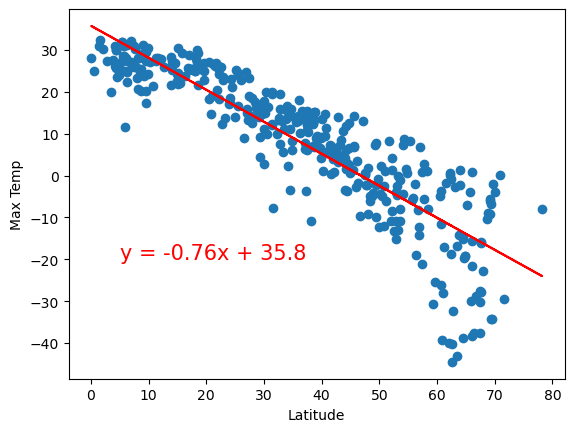

In [120]:
# Linear regression on Northern Hemisphere

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rValue**2}")
plt = plotting(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],regress_values,line_eq,(5,-20),'Latitude','Max Temp')
plt.show()

The r-value is: 0.35838622028928974


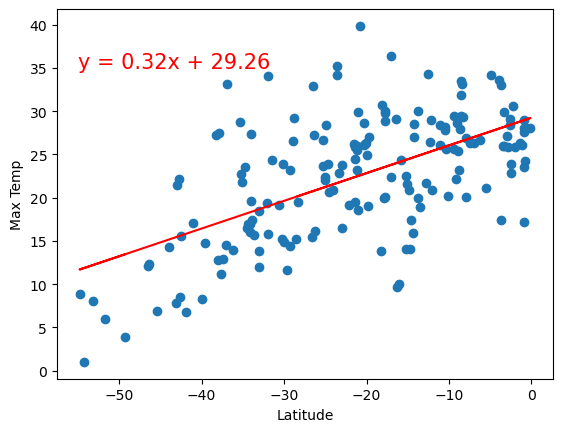

In [121]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue_south, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue_south**2}")
plt=plotting(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],regress_values,line_eq,(-55,35),'Latitude','Max Temp')
plt.show()

**Discussion about the linear relationship:** 
Northern hemisphere - 
The latitude and maximum temperature are negatively correlated (as the latitude increases, the maximum temperature decreases). Also, the r value is 0.8 which shows there is a strong correlation.
Southern hemisphere - 
The latitude and maximum temperature are positively correlated (as the latitude increases, the maximum temperature increases) with a moderate correlation with r value about 0.4.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08446653029318568


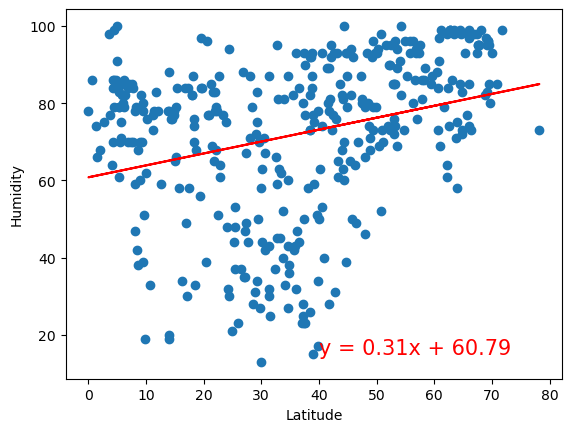

In [122]:
# Northern Hemisphere
(slope, intercept, rvalue_humid, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue_humid**2}")
plt=plotting(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],regress_values,line_eq,(40,15),'Latitude','Humidity')
plt.show()

The r-value is: 0.0545796763087646


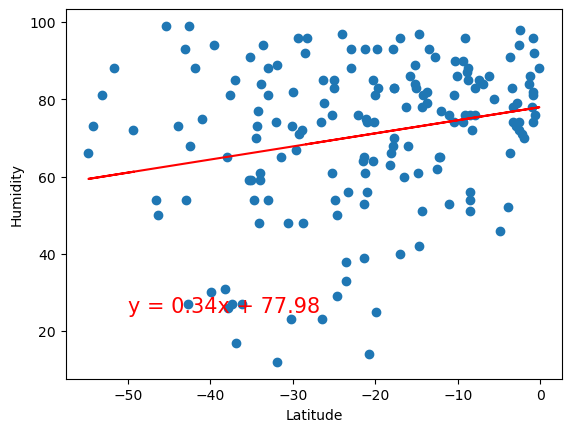

In [123]:
# Southern Hemisphere
(slope, intercept, rvalue_humid_south, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue_humid_south**2}")
plt=plotting(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],regress_values,line_eq,(-50,25),'Latitude','Humidity')
plt.show()

**Discussion about the linear relationship:** 
Northern hemisphere - 
The latitude and humidity are positively correlated (as the latitude increases, the humidity increases) with a very weak correlation with r value about 0.08.
Southern hemisphere - 
The latitude and humidity are positively correlated (as the latitude increases, the humidity increases) with a very weak or no correlation with r value about 0.05.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.022932904603521837


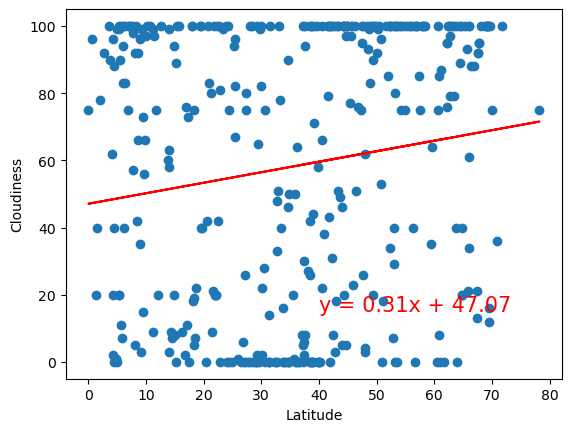

In [125]:
# Northern Hemisphere
(slope, intercept, rvalue_cloud, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue_cloud**2}")
plt=plotting(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],regress_values,line_eq,(40,15),'Latitude','Cloudiness')
plt.show()

The r-value is: 0.10023745484175046


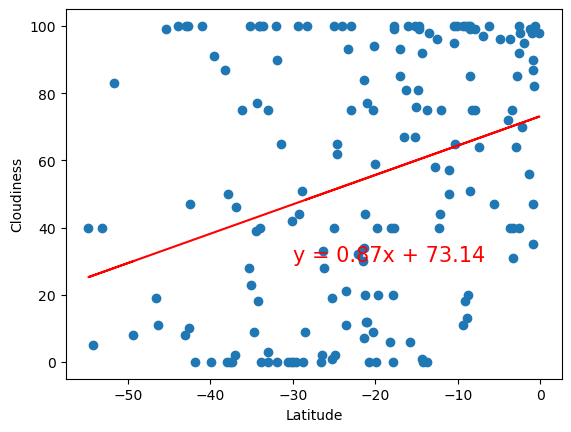

In [126]:
# Southern Hemisphere
(slope, intercept, rvalue_cloud_south, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue_cloud_south**2}")
plt=plotting(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],regress_values,line_eq,(-30,30),'Latitude','Cloudiness')
plt.show()

**Discussion about the linear relationship:**
Northern hemisphere - 
The latitude and cloudiness are positively correlated (as the latitude increases, the humidity increases) with a very weak or no correlation with r value about 0.02.

Southern hemisphere - 
The latitude and cloudiness are positively correlated (as the latitude increases, the humidity increases) with a very weak or no correlation with r value about 0.1.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0003681865794260478


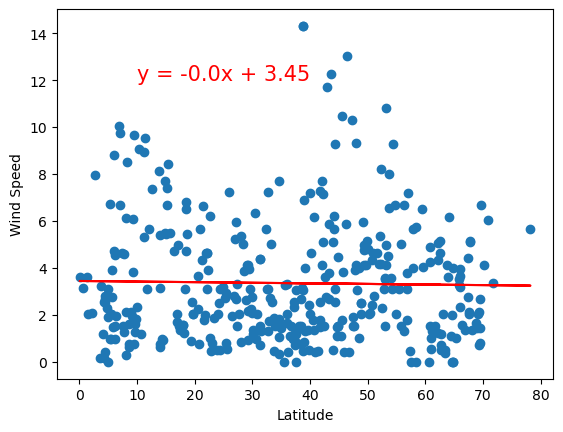

In [127]:
# Northern Hemisphere
(slope, intercept, rvalue_wind, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue_wind**2}")
plt = plotting(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],regress_values,line_eq,(10,12),'Latitude','Wind Speed')
plt.show()

The r-value is: 0.07570703655498712


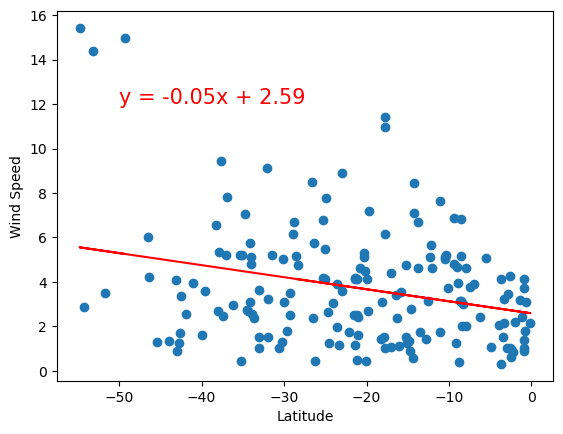

In [128]:
# Southern Hemisphere
(slope, intercept, rvalue_wind_south, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue_wind_south**2}")
plt = plotting(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],regress_values,line_eq,(-50,12),'Latitude','Wind Speed')
plt.show()

**Discussion about the linear relationship:**
Both northern and southern hemispheres have very weak or no correlation between latitude and wind speed (0.0003, 0.07 respectively).